In [6]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
API_KEY = "KRN14ZLFIAEX3YGN"

# Working with time Series
We first download the data with our api key.

In [52]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
#DJI = https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

#intraday - get data by minutes
#data, meta_data = ts.get_intraday(symbol='DJI',interval='30min', outputsize='full')
#data, meta_data = ts.get_intraday(symbol='DJI',interval='30min', outputsize='compact')

#daily - get daily info up to 20a
allData, meta_data = ts.get_daily(symbol='DJI', outputsize='full')
#data, meta_data = ts.get_daily(symbol='DJI', outputsize='compact')


In [53]:
# We can describe it
print(allData.describe())
print(meta_data)

            1. open      2. high        3. low      4. close     5. volume
count   4720.000000   4720.00000   4720.000000   4720.000000  4.720000e+03
mean   13244.359442  13321.49584  13164.807707  13247.114252  2.135922e+08
std     4301.314051   4304.30150   4299.278384   4302.689666  9.799132e+07
min     6547.009800   6709.60990   6469.950200   6547.049800  8.410000e+06
25%    10368.024650  10429.10500  10291.844725  10368.275375  1.386275e+08
50%    11564.475100  11636.38525  11500.779750  11570.955100  2.090350e+08
75%    16057.397475  16172.23000  15947.947775  16059.954575  2.668150e+08
max    26833.470700  26951.81050  26789.080100  26828.390600  8.239400e+08
{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'DJI', '3. Last Refreshed': '2018-10-04', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}


In [60]:
#data = allData[:100] # first n rows
data = allData
print (data.describe())
print(data.index)

            1. open      2. high        3. low      4. close     5. volume
count   4720.000000   4720.00000   4720.000000   4720.000000  4.720000e+03
mean   13244.359442  13321.49584  13164.807707  13247.114252  2.135922e+08
std     4301.314051   4304.30150   4299.278384   4302.689666  9.799132e+07
min     6547.009800   6709.60990   6469.950200   6547.049800  8.410000e+06
25%    10368.024650  10429.10500  10291.844725  10368.275375  1.386275e+08
50%    11564.475100  11636.38525  11500.779750  11570.955100  2.090350e+08
75%    16057.397475  16172.23000  15947.947775  16059.954575  2.668150e+08
max    26833.470700  26951.81050  26789.080100  26828.390600  8.239400e+08
Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
       '2018-09-28', '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04'],
     

In [61]:
import pandas as pd

dates = data.index

print(dates[:5])

date = dates[0]
print (date, type(date))

date = pd.to_datetime(str(dates[0]))
print (date, type(date))


Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07'], dtype='object', name='date')
2000-01-03 <class 'str'>
2000-01-03 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


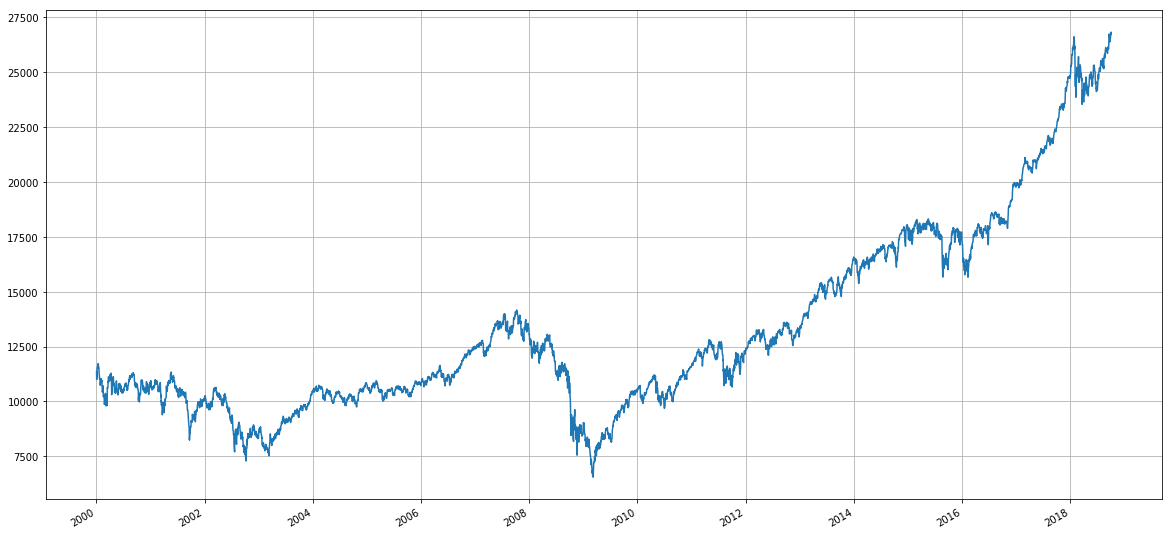

In [65]:
import matplotlib.dates as mdates
import datetime as dt
import numpy as np

# change the dates in indexes to pandas Timestamps
dates = pd.to_datetime(dates)

fig, ax = plt.subplots()
ax.plot(dates, data["4. close"])

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.grid()
plt.show()

Check the meta data given back by the api call.

In [18]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2018-09-24 15:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

## Getting csv data

In [19]:
ts = TimeSeries(key=API_KEY, output_format='csv')
data_csv,_ = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
data_csv

## Plotting time series

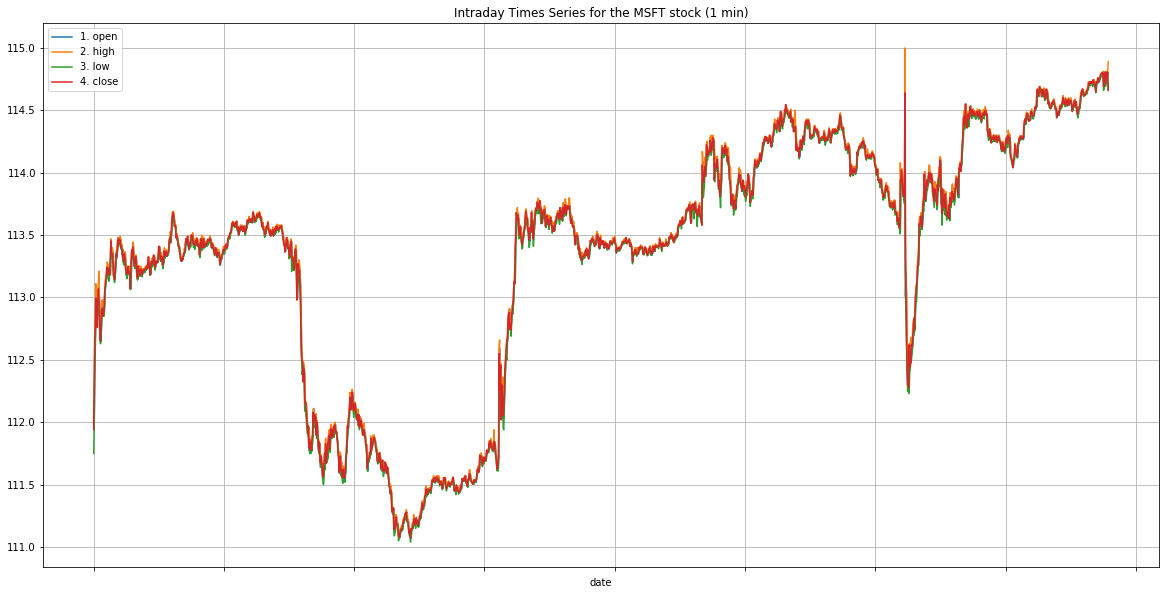

In [20]:
data = data.drop('5. volume',1)
data.plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

# Working with batch quotes

In [21]:
# It is still a TimeSeries call
ts.output_format='pandas'
data, meta_data = ts.get_batch_stock_quotes(symbols=('MSFT', 'FB', 'AAPL'))
data.describe()

,1. symbol,2. price,3. volume,4. timestamp
count,3,3,3,3
unique,3,3,1,2
top,MSFT,114.8100,--,2018-09-24 15:59:59
freq,1,1,3,2


In [22]:
data.head(3)

,1. symbol,2. price,3. volume,4. timestamp
date,,,,
0,MSFT,114.8100,--,2018-09-24 15:59:55
1,FB,165.4100,--,2018-09-24 15:59:59
2,AAPL,220.8000,--,2018-09-24 15:59:59


# Working with technical indicators

In [23]:
ti = TechIndicators(key=API_KEY, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

,Real Middle Band,Real Upper Band,Real Lower Band
count,358.000000,358.000000,358.000000
mean,108.038016,110.920503,105.155532
std,2.526141,2.496406,2.749842
min,101.028300,104.185100,97.803900
25%,107.330150,109.689550,104.045400
50%,107.947300,110.542150,105.709450
75%,110.265000,113.429875,107.088850
max,113.087000,114.991900,111.183700


In [24]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2018-09-24 15:30:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

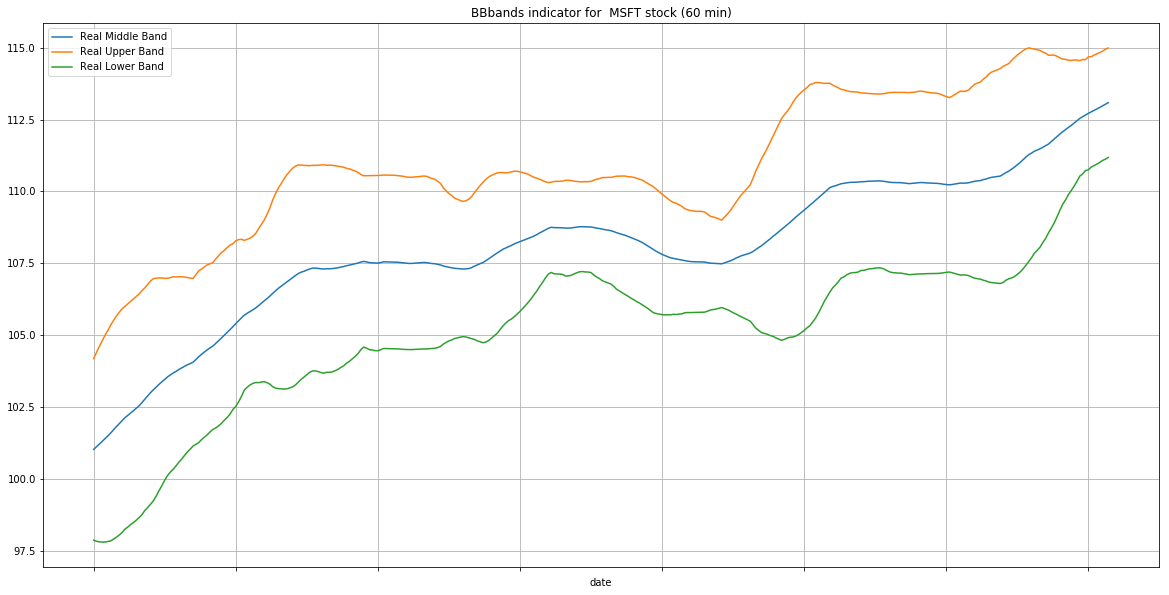

In [25]:
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.grid()
plt.show()

# Working with Sector Performance

In [27]:
sp = SectorPerformances(key=API_KEY, output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000
mean,-0.005900,-0.005891,0.003536,0.016936,0.051927,0.046573,0.105445,0.421680,0.573010,1.310660
std,0.010144,0.010141,0.018492,0.018520,0.032095,0.086364,0.114222,0.250931,0.461224,1.104633
min,-0.018900,-0.018900,-0.027600,-0.018800,0.008700,-0.049100,-0.014900,0.127900,-0.076900,0.094300
25%,-0.013650,-0.013650,-0.003650,0.009800,0.029300,-0.011200,0.009800,0.245975,0.339950,0.590900
50%,-0.008900,-0.008800,0.005700,0.022300,0.050300,0.018400,0.097200,0.419250,0.518850,0.852450
75%,0.001850,0.001850,0.016050,0.028900,0.069950,0.100950,0.146150,0.543300,0.817825,1.906125
max,0.014700,0.014700,0.032400,0.037600,0.112200,0.189000,0.304600,0.965100,1.498100,3.136800


In [ ]:
meta_data

## Plotting Sector Performance

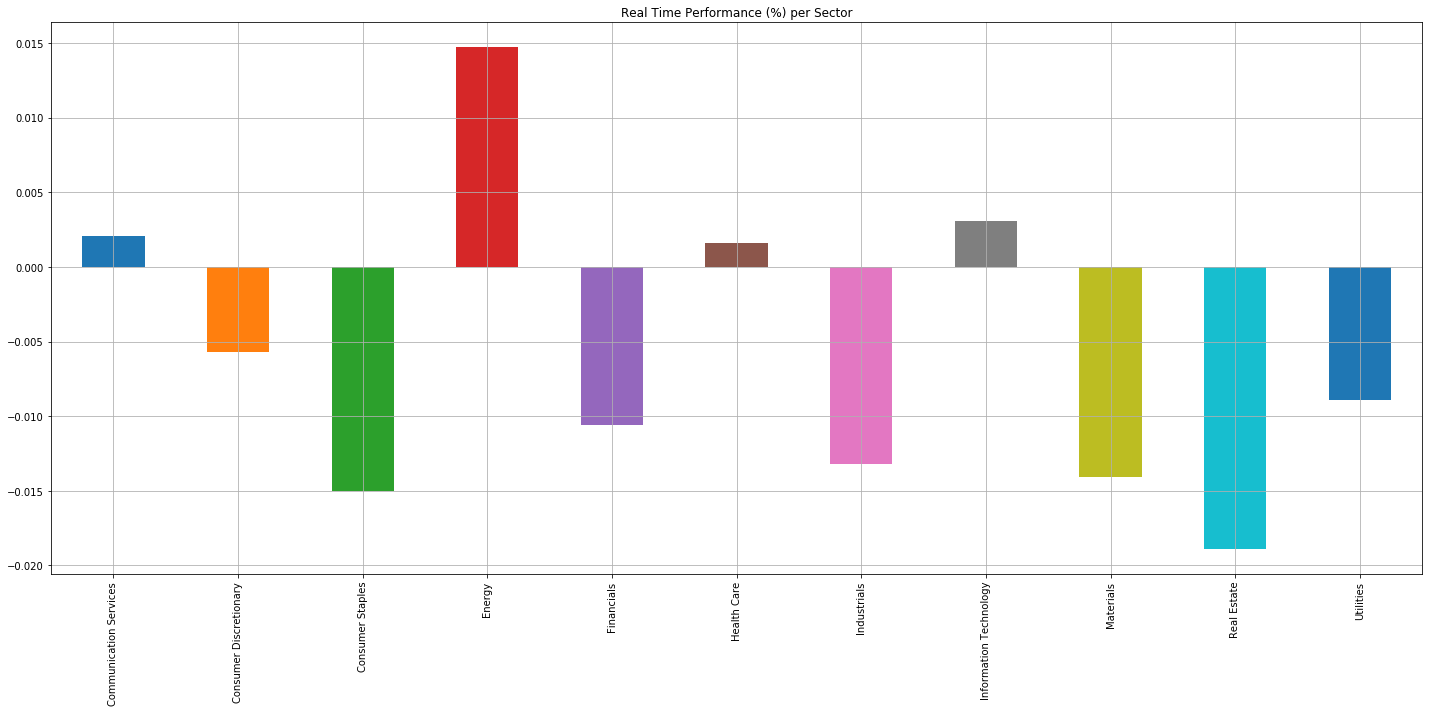

In [28]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

# Working with Crypto Currencies

To just get the current exchange rate

In [ ]:
cc = CryptoCurrencies(key=API_KEY)

To get the intraday price of bitcoin 

In [29]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data.describe()

,1a. price (CNY),1b. price (USD),2. volume,3. market cap (USD)
count,461.000000,461.000000,461.000000,4.610000e+02
mean,45640.504543,6656.491146,3790.856333,2.523222e+07
std,493.388219,78.567944,28.313386,2.105659e+05
min,44559.542307,6492.988463,3706.812325,2.467928e+07
25%,45360.632607,6611.214378,3768.252459,2.507009e+07
50%,45746.357477,6668.337733,3794.764398,2.526746e+07
75%,46000.994079,6720.398026,3811.632910,2.538718e+07
max,46432.662728,6790.093770,3856.655280,2.564228e+07


In [30]:
data.head(5)

,1a. price (CNY),1b. price (USD),2. volume,3. market cap (USD)
date,,,,
2018-09-23 19:50:00,46089.144720,6733.580726,3777.127109,2.543359e+07
2018-09-23 19:55:00,46030.688953,6725.040393,3776.868596,2.539959e+07
2018-09-23 20:00:00,46375.615831,6775.433886,3776.888821,2.559006e+07
2018-09-23 20:05:00,46337.723144,6783.247913,3762.161504,2.551967e+07
2018-09-23 20:10:00,46060.620895,6742.683700,3768.072657,2.540692e+07


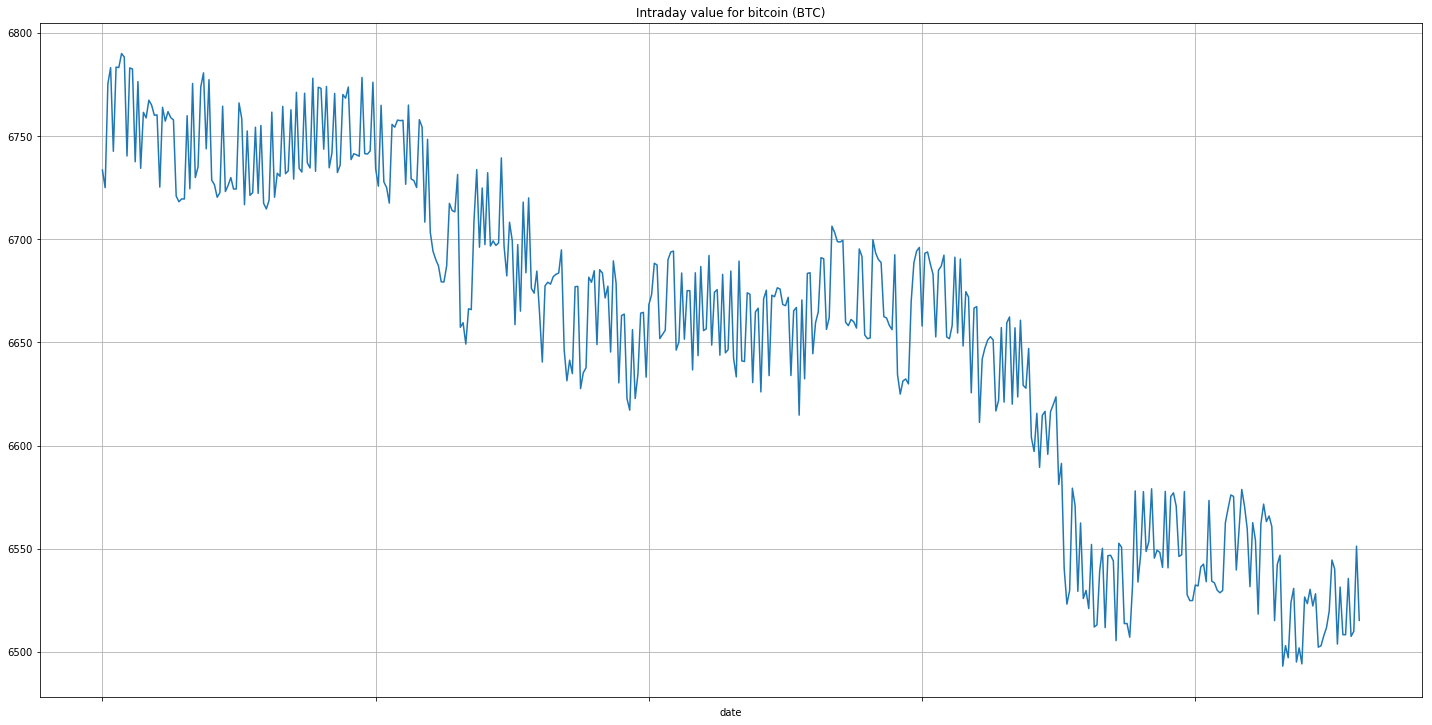

In [31]:
data['1b. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()